# Analysis of Data Science Stack Exchange

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dss_questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
dss_questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
dss_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


A look at the favorite column which shows posts that users have favorited, there are more than 7000 null values that could be better represented by a zero.

In [5]:
dss_questions["FavoriteCount"].fillna(0, inplace=True)
dss_questions["FavoriteCount"] = dss_questions["FavoriteCount"].astype(int)

The tag column includes characters that might restrict in-depth analysis, distinct tags are better split by a comma rather than the "><" characters

In [6]:
dss_questions["Tags"] = dss_questions["Tags"].astype(str).str.replace("^<|>$", "").str.split("><")

In [7]:
dss_questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


First, we count all instances of unique tags to understand the frequency by which the tags are used

In [8]:
tag_count = {}

for tags in dss_questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [9]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)

tag_count.head(10)

,Count
multilabel-classification,92
matrix-factorisation,24
data-imputation,16
markov-process,14
data-mining,217
pooling,4
kaggle,43
one-shot-learning,2
feature-selection,209
random-forest,159


In [10]:
most_used = tag_count.sort_values(by="Count", ascending=False).head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


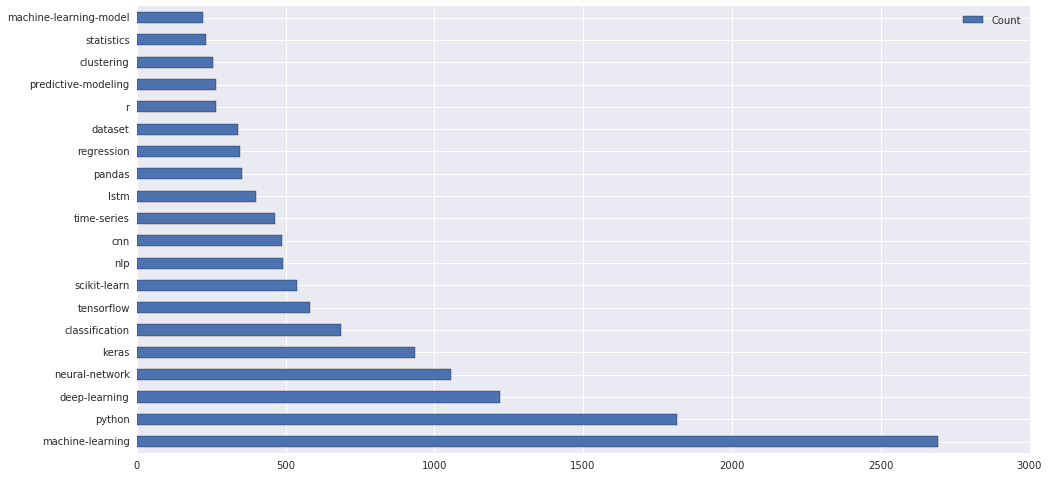

In [11]:
most_used.plot(kind="barh", figsize=(16,8))

We can see that the tags "machine-learning" and "python" are the most used tags by a large difference

In [12]:
tag_view_count = {}

for index, row in dss_questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

In [13]:
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

In [14]:
most_viewed = tag_view_count.sort_values(by="ViewCount", ascending=False).head(20)
most_viewed

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


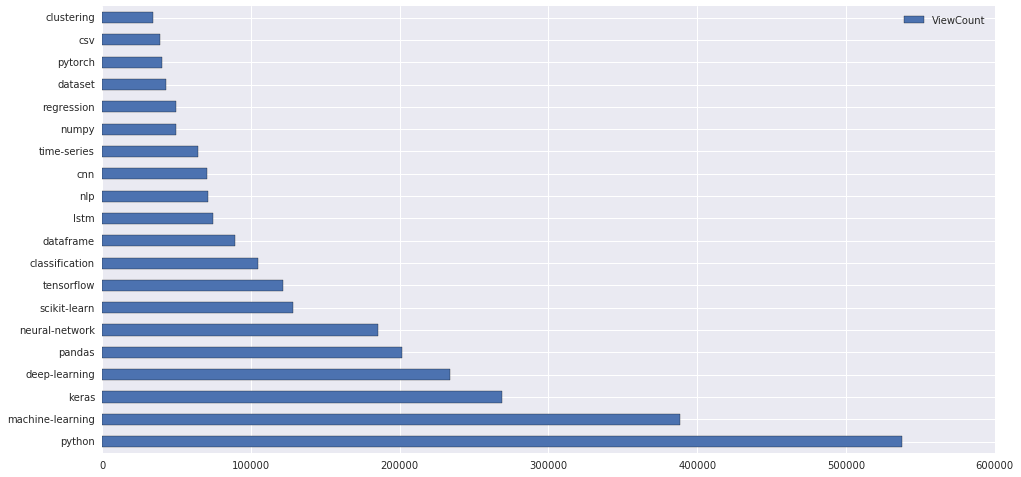

In [15]:
most_viewed.plot(kind="barh", figsize=(16,8))

In [16]:
tag_favorite_count = {}

for index, row in dss_questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_favorite_count:
            tag_favorite_count[tag] += row['FavoriteCount']
        else:
            tag_favorite_count[tag] = row['FavoriteCount']
            
tag_favorite_count = pd.DataFrame.from_dict(tag_favorite_count, orient="index")
tag_favorite_count.rename(columns={0: "FavoriteCount"}, inplace=True)


In [17]:
most_favorited = tag_favorite_count.sort_values(by="FavoriteCount", ascending=False).head(20)
most_favorited

,FavoriteCount
machine-learning,575
python,325
deep-learning,266
neural-network,227
keras,181
classification,153
scikit-learn,113
cnn,100
time-series,97
nlp,94


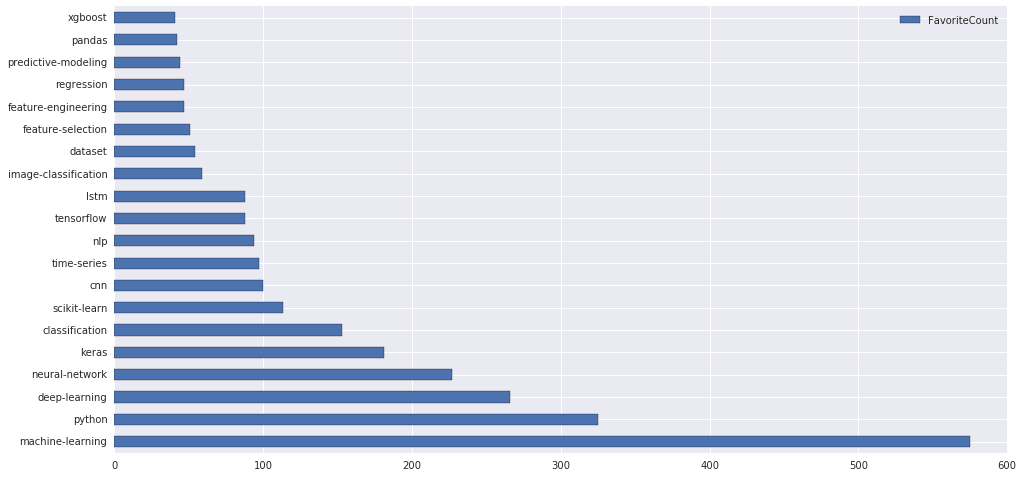

In [18]:
most_favorited.plot(kind="barh", figsize=(16,8))

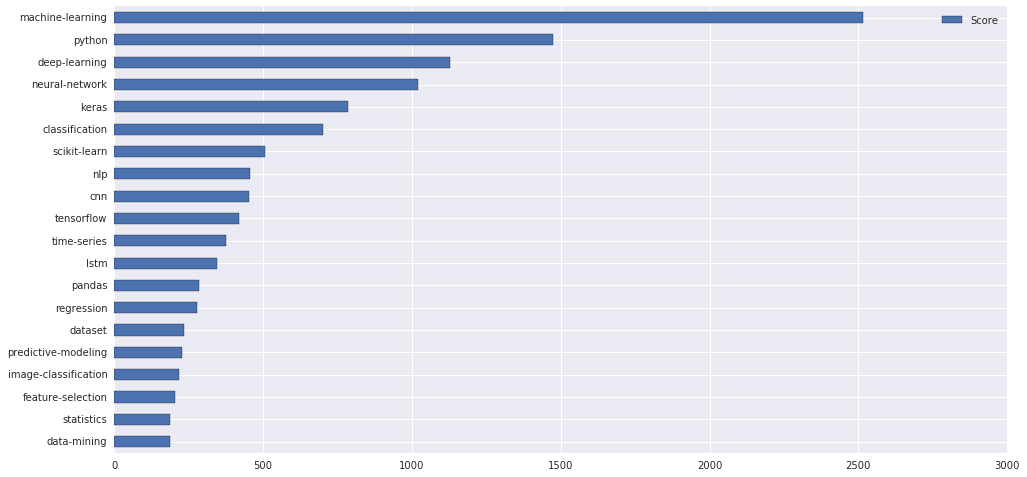

In [19]:
tag_score_count = {}

for index, row in dss_questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_score_count:
            tag_score_count[tag] += row["Score"]
        else:
            tag_score_count[tag] = row["Score"]
    
tag_score_count = pd.DataFrame.from_dict(tag_score_count, orient = "index")
tag_score_count.rename(columns={0:"Score"}, inplace = True)

highest_scored_tags = tag_score_count.sort_values(by="Score").tail(20)
highest_scored_tags.plot(kind= "barh", figsize= (16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f103dee80>],
      dtype=object)

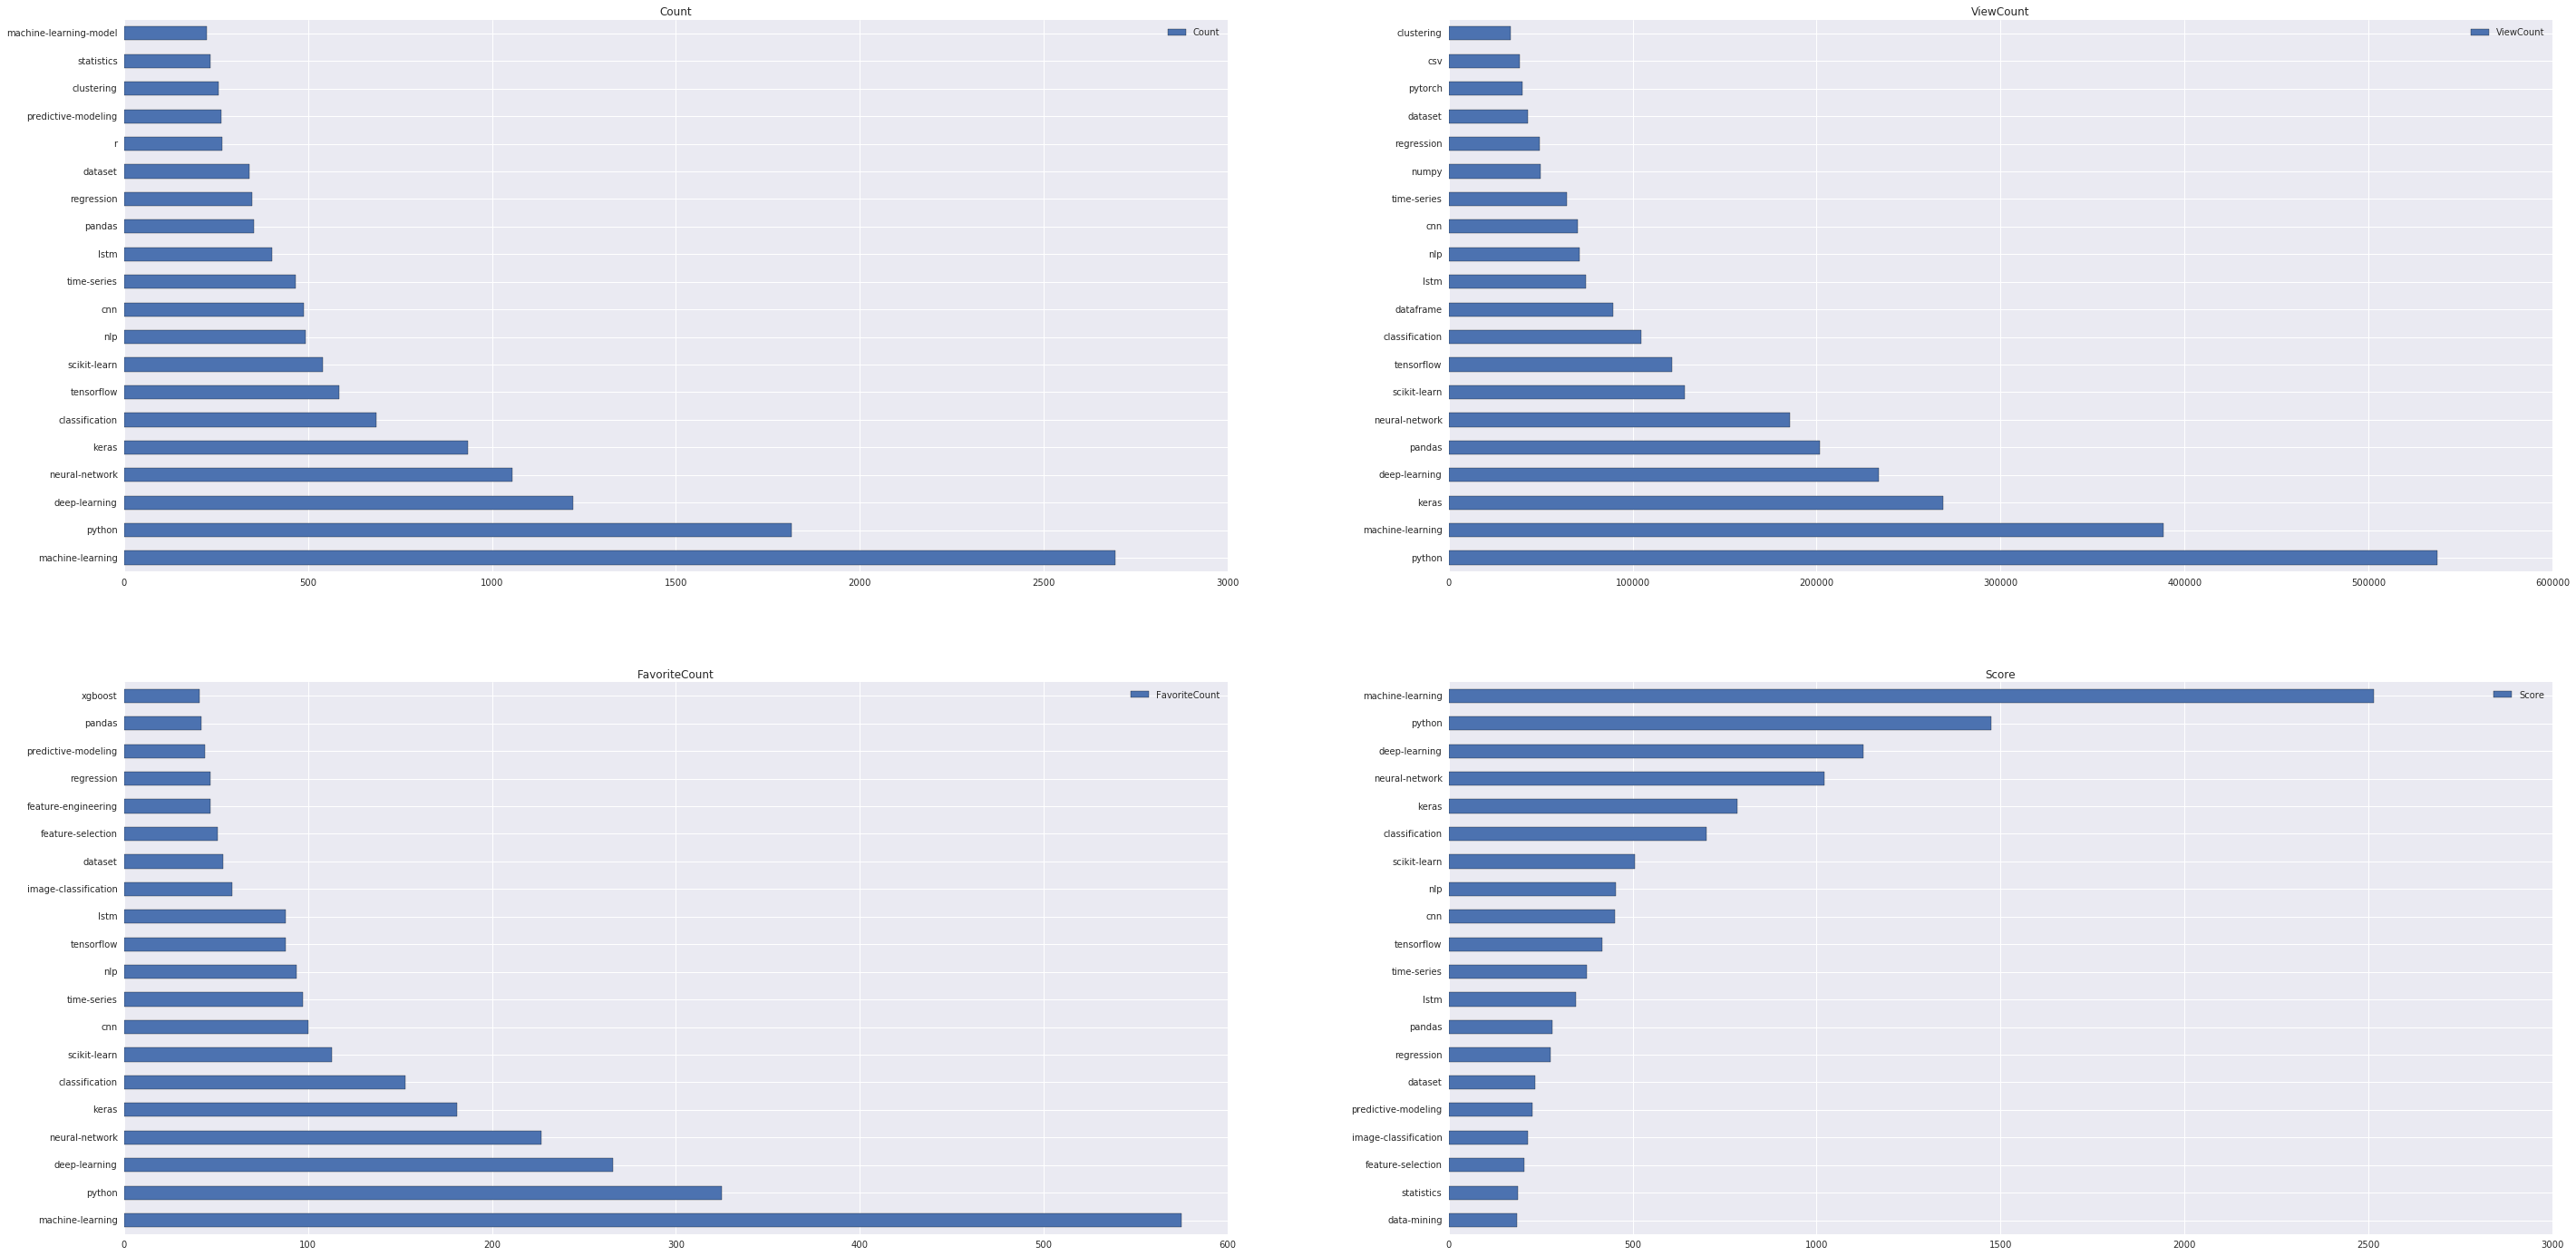

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches((48, 24))
most_used.plot(kind="barh", ax=axes[0,0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[0,1], subplots=True)
most_favorited.plot(kind="barh", ax=axes[1,0], subplots=True)
highest_scored_tags.plot(kind="barh", ax=axes[1,1], subplots=True)

Machine-learning and python tags are dominant in each category showing the magnitude of these topics to the Data Science Stack Exchange

In [21]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_views = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
pd.concat([in_used,in_views]).drop_duplicates(keep=False)

,Count,ViewCount
r,268.0,NaN
predictive-modeling,265.0,NaN
statistics,234.0,NaN
machine-learning-model,224.0,NaN
dataframe,NaN,89352.0
numpy,NaN,49767.0
pytorch,NaN,40240.0
csv,NaN,38654.0


From the top 20, we can see that tags present in most_used and not present in most_viewed are:

 - r
 - predictive-modeling
 - statistics
 - machine-learning-model

And the tags present in most_viewed but not in most_used are:

 - dataframe
 - numpy
 - pytorch
 - csv

## Relations between Tags

In [22]:
all_tags = pd.DataFrame(index=tag_count.index, columns=tag_count.index)
all_tags.head()

,multilabel-classification,matrix-factorisation,data-imputation,markov-process,data-mining,pooling,kaggle,one-shot-learning,feature-selection,random-forest,...,python-3.x,markov-hidden-model,google-cloud,generalization,evolutionary-algorithms,counts,similar-documents,google-prediction-api,dynamic-programming,svr
multilabel-classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matrix-factorisation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-imputation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
markov-process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
all_tags.fillna(0,inplace=True)
all_tags.head(4)

,multilabel-classification,matrix-factorisation,data-imputation,markov-process,data-mining,pooling,kaggle,one-shot-learning,feature-selection,random-forest,...,python-3.x,markov-hidden-model,google-cloud,generalization,evolutionary-algorithms,counts,similar-documents,google-prediction-api,dynamic-programming,svr
multilabel-classification,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
matrix-factorisation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data-imputation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
markov-process,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for tags in dss_questions["Tags"]:
    all_tags.loc[tags,tags] +=1
all_tags.head(4)

,multilabel-classification,matrix-factorisation,data-imputation,markov-process,data-mining,pooling,kaggle,one-shot-learning,feature-selection,random-forest,...,python-3.x,markov-hidden-model,google-cloud,generalization,evolutionary-algorithms,counts,similar-documents,google-prediction-api,dynamic-programming,svr
multilabel-classification,92,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
matrix-factorisation,0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data-imputation,0,0,16,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
markov-process,0,0,0,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
most_used_tags = all_tags.loc[most_used.index, most_used.index]
most_used_tags

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


From the data table above, the mostly used pair of tags is python and machine-learning, having been used in 499 questions

## Analysis of Deep Learning Questions 

In [26]:
all_questions = pd.read_csv('all_questions.csv',parse_dates=["CreationDate"])
print(all_questions.info())

# transform tag column
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',').str.replace("<|>","").str.split(',')
all_questions['Tags'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB
None


0        [python, keras, tensorflow, cnn, probability]
1                                     [neural-network]
2                        [python, ibm-watson, chatbot]
3                                              [keras]
4    [r, predictive-modeling, machine-learning-mode...
Name: Tags, dtype: object

To classify questions as deep learning questions, find the tags that relate to deep-learning questions.

The tags scikit-learn, keras, nlp, tensorflow, cnn, lstm, deep-learning and neural-network can be classified as tags related to deep learning. Now we have the list of tags related to deep learning, let's count how many deep learning questions were asked.

In [27]:
def count_deeplearning_tags(tags):
    deeplearn = ["scikit-learn","keras","nlp","tensorflow","cnn","lstm","deep-learning","neural-network"]
    for t in tags:
        if t in deeplearn:
            return 1
        return 0
    

all_questions["DeepLearning"] = all_questions["Tags"].apply(count_deeplearning_tags)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Now let's focus on counting the number of deep learning questions asked per time period. We can group the results based on time period in days, weeks, months, quaterly, half yearly and yearly basis. Let's group the results by year and analyse the trends.

In [28]:
dl_year = all_questions.groupby(by=all_questions['CreationDate'].dt.year).count()
dl_year['DeepLearning']

CreationDate
2014     562
2015    1167
2016    2146
2017    2957
2018    5475
2019    8810
2020     459
Name: DeepLearning, dtype: int64

There are comparitively less number of posts in the year 2014 and 2020. Let's determine if our dataframe has data for all the 12 months for the years 2014 and 2020.

In [29]:
print("first 5 rows in 2014 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2014].head(2))
print("\nlast 5 rows in 2014 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2014].tail(2))
print("\nlast 5 rows in 2020 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2020].head(2))
print("\nlast 5 rows in 2020 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2020].tail())

first 5 rows in 2014 
 65   2014-05-13 23:58:30
66   2014-05-14 00:11:06
Name: CreationDate, dtype: datetime64[ns]

last 5 rows in 2014 
 4214   2014-12-31 02:50:32
4215   2014-12-31 17:57:48
Name: CreationDate, dtype: datetime64[ns]

last 5 rows in 2020 
 20304   2020-01-01 01:07:22
20305   2020-01-01 07:53:47
Name: CreationDate, dtype: datetime64[ns]

last 5 rows in 2020 
 21320   2020-01-18 21:17:34
21321   2020-01-18 23:56:27
21322   2020-01-19 00:49:00
21323   2020-01-19 02:21:53
21324   2020-01-19 03:01:03
Name: CreationDate, dtype: datetime64[ns]


As the data does not include all data for the 12 months in a year, we can drop the years 2014 and 2020 from our analysis.

In [30]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]
all_questions = all_questions[all_questions["CreationDate"].dt.year > 2014]

year_df = all_questions.copy()
year_df["Year"] = year_df['CreationDate'].dt.year

year_dl = year_df['DeepLearning'].groupby(by=year_df["Year"]).count()

year_data = pd.DataFrame(year_dl)
year_data.rename(columns={"DeepLearning": "AllPosts"}, inplace=True)

year_data["TotalDL_Posts"] = year_df['DeepLearning'].groupby(by=year_df["Year"]).sum()

year_data["DLPostsRate"] = round(year_data['TotalDL_Posts']/year_data['AllPosts']*100,2)

year_data

,AllPosts,TotalDL_Posts,DLPostsRate
Year,,,
2015,1167,63,5.40
2016,2146,268,12.49
2017,2957,536,18.13
2018,5475,1154,21.08
2019,8810,2064,23.43


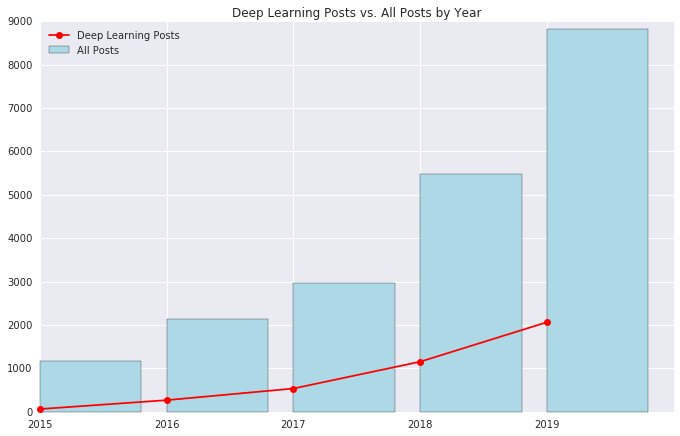

In [31]:
fig = plt.figure(figsize=(25,7)) 
ax = fig.add_subplot(1,2,1)

ax.plot(year_data.index,'TotalDL_Posts',data=year_data,clip_on = False, color='red', marker='o',label='Deep Learning Posts')
ax.bar(year_data.index,'AllPosts',data=year_data,clip_on = False, color='lightblue',label='All Posts')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
plt.xticks(year_data.index)
ax.set_xticklabels(year_data.index)
ax.set_title('Deep Learning Posts vs. All Posts by Year')
ax.legend(loc='best')
plt.tick_params(left=False,right=False, top=False,bottom=False)
plt.show()

## Conclusion

From our analysis, we found that there is an increase of approx. 23.5% in the Deep Learning questions posted on Data Science Stack Exchange and definitely proves that Deep Learning is turning into one of the most popular topics in DSSE.

Tags "machine-learning" followed by "python" received more answered and were marked as favorite the most.